## Local Relational Novelty

> Based on Kyriakou et. al. (2022). Novelty and the Structure of Design Landscapes: A Relational View of Online Innovation Communities

> For a single person similarity score of a particular phase, we will get the compared similarity score of the other people in the previous phase. We will identify the one with the highest similarity score to the other person. The novelty measure is then 1 - the highest similarity score. For each design in a phase, the novelty measure. Novelty is a dependent variable in our model. 

In [1]:
%store -r df1
%store -r df2
%store -r df3
%store -r df4

%store -r df1_bogota0
%store -r df2_bogota0
%store -r df3_bogota0
%store -r df4_bogota0

%store -r df1_bogota1
%store -r df2_bogota1
%store -r df3_bogota1
%store -r df4_bogota1

%store -r df1_bogota2
%store -r df2_bogota2
%store -r df3_bogota2
%store -r df4_bogota2

%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase4_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal

In [2]:
pd.set_option('display.max_rows', None)
phase12_bogota3 = df4[~(df4['user2'] == df4['user1'])]
stage1_bogota3 = phase12_bogota3.loc[(phase12_bogota3['user1_phase'] == 1) & (phase12_bogota3['user2_phase'] == 2)]
stage1_bogota3 


user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            1            2   
42             lemartinp           nfmorenog            1            2   
43             lemartinp           AFelipeGA            1            2   
44             lemartinp          mballeng91            1            2   
45             lemartinp            dduartec            1            2   
46             lemartinp           srmedinac            1            2   
47             lemartinp        wilson911013            1            2   
48             lemartinp       wapiravaguens            1            2   
49             lemartinp            davidh17            1            2   
50             lemartinp      DianaNavarrete            1            2   
51             lemartinp           jdmonroyg            1            2   
52             lemartinp           jorge52an            1            2   
53             lemartinp     jscastelblancoh            1            2   
54             lemartinp          juclopezso            1            2   
55             lemartinp           afforeroc            1            2   
56             lemartinp         dagofonseca            1            2   
57             lemartinp         lacardenasv            1            2   
58             lemartinp         oacastillol            1            2   
59             lemartinp          ncampuzano            1            2   
60             lemartinp            adriel62            1            2   
61             lemartinp            capinzor            1            2   
62             lemartinp            ofnanezn            1            2   
63             lemartinp           macuestap            1            2   
64             lemartinp              spenas            1            2   
65             lemartinp         kgbayala528            1            2   
66             lemartinp          lgmoralesa            1            2   
67             lemartinp          ronaldsg20            1            2   
68             lemartinp       cccristanchoc            1            2   
69             lemartinp          jmalvarezd            1            2   
70             lemartinp           smarquezo            1            2   
71             lemartinp             sarizag            1            2   
72             lemartinp            Chranium            1            2   
73             lemartinp             DavidQP            1            2   
74             lemartinp         afceballosr            1            2   
75             lemartinp           lizzyt10h            1            2   
76             lemartinp          NicolasPrr            1            2   
77             lemartinp       jumcorredorro            1            2   
78             lemartinp          feartheGru            1            2   
79             lemartinp        Danielsv9207            1            2   
80             lemartinp  JhonEmmanuelTorres            1            2   
120            juligarji           lemartinp            1            2   
122            juligarji           nfmorenog            1            2   
123            juligarji           AFelipeGA            1            2   
124            juligarji          mballeng91            1            2   
125            juligarji            dduartec            1            2   
126            juligarji           srmedinac            1            2   
127            juligarji        wilson911013            1            2   
128            juligarji       wapiravaguens            1            2   
129            juligarji            davidh17            1            2   
130            juligarji      DianaNavarrete            1            2   
131            juligarji           jdmonroyg            1            2   
132            juligarji           jorge52an            1            2   
133            juligarji     jscastelblancoh            1            2   
134            juligarj

In [3]:
stage1_bogota3_high_similarity = stage1_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0         Danielsv9207     jscastelblancoh            1            2   
1           feartheGru        Danielsv9207            1            2   
2      jscastelblancoh         dagofonseca            1            2   
3      jscastelblancoh          feartheGru            1            2   
4           ncampuzano  JhonEmmanuelTorres            1            2   
5           ncampuzano             sarizag            1            2   
6        wapiravaguens             DavidQP            1            2   
7   JhonEmmanuelTorres          ncampuzano            1            2   
8               spenas          mballeng91            1            2   
9        wapiravaguens          juclopezso            1            2   
10           srmedinac      DianaNavarrete            1            2   
11           nfmorenog            Chranium            1            2   
12      DianaNavarrete           srmedinac            1            2   
13           srmedinac            dduartec            1            2   
14         lacardenasv          jmalvarezd            1            2   
15      DianaNavarrete          NicolasPrr            1            2   
16              spenas           lemartinp            1            2   
17              spenas         lacardenasv            1            2   
18             DavidQP       wapiravaguens            1            2   
19            adriel62          ronaldsg20            1            2   
20              spenas           juligarji            1            2   
21           juligarji              spenas            1            2   
22      DianaNavarrete           nfmorenog            1            2   
23          NicolasPrr           jdmonroyg            1            2   
24            Chranium       jumcorredorro            1            2   
25             DavidQP           smarquezo            1            2   
26           nfmorenog       cccristanchoc            1            2   
27          jmalvarezd            adriel62            1            2   
28          jmalvarezd           AFelipeGA            1            2   
29          jmalvarezd        wilson911013            1            2   
30      DianaNavarrete            davidh17            1            2   
31            adriel62            ofnanezn            1            2   
32           smarquezo           jorge52an            1            2   
33      DianaNavarrete           lizzyt10h            1            2   
34         afceballosr         kgbayala528            1            2   
35            adriel62           macuestap            1            2   
36            adriel62           afforeroc            1            2   
37              spenas            capinzor            1            2   
38         oacastillol         afceballosr            1            2   
39      DianaNavarrete          lgmoralesa            1            2   
40           juligarji         oacastillol            1            2   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     1.000000  
5     0.750000  
6     0.600000  
7     0.600000  
8     0.565789  
9     0.555556  
10    0.482759  
11    0.482759  
12    0.466667  
13    0.461538  
14    0.448276  
15    0.444444  
16    0.430233  
17    0.417722  
18    0.416667  
19    0.409091  
20    0.393333  
21    0.353333  
22    0.352941  
23    0.347826  
24    0.285714  
25    0.267857  
26    0.266667  
27    0.254902  
28    0.244898  
29    0.216867  
30    0.214286  
31    0.212121  
32    0.210526  
33    0.200000  
34    0.101449  
35    0.056338  
36    0.046875  
37    0.046595  
38    0.031275  
39    0.028571  
40    0.023352

In [4]:
import matplotlib.pyplot as plt
phase23_bogota3 = df3[~(df3['user1'] == df3['user2'])]
stage2_bogota3 = phase23_bogota3.loc[(phase23_bogota3['user1_phase'] == 2) & (phase23_bogota3['user2_phase'] == 3)]
stage2_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            2            3   
42             lemartinp           nfmorenog            2            3   
43             lemartinp           AFelipeGA            2            3   
44             lemartinp          mballeng91            2            3   
45             lemartinp            dduartec            2            3   
46             lemartinp           srmedinac            2            3   
47             lemartinp        wilson911013            2            3   
48             lemartinp       wapiravaguens            2            3   
49             lemartinp            davidh17            2            3   
50             lemartinp      DianaNavarrete            2            3   
51             lemartinp           jdmonroyg            2            3   
52             lemartinp           jorge52an            2            3   
53             lemartinp     jscastelblancoh            2            3   
54             lemartinp          juclopezso            2            3   
55             lemartinp           afforeroc            2            3   
56             lemartinp         dagofonseca            2            3   
57             lemartinp         lacardenasv            2            3   
58             lemartinp         oacastillol            2            3   
59             lemartinp          ncampuzano            2            3   
60             lemartinp            adriel62            2            3   
61             lemartinp            capinzor            2            3   
62             lemartinp            ofnanezn            2            3   
63             lemartinp           macuestap            2            3   
64             lemartinp              spenas            2            3   
65             lemartinp         kgbayala528            2            3   
66             lemartinp          lgmoralesa            2            3   
67             lemartinp          ronaldsg20            2            3   
68             lemartinp       cccristanchoc            2            3   
69             lemartinp          jmalvarezd            2            3   
70             lemartinp           smarquezo            2            3   
71             lemartinp             sarizag            2            3   
72             lemartinp            Chranium            2            3   
73             lemartinp             DavidQP            2            3   
74             lemartinp         afceballosr            2            3   
75             lemartinp           lizzyt10h            2            3   
76             lemartinp          NicolasPrr            2            3   
77             lemartinp       jumcorredorro            2            3   
78             lemartinp          feartheGru            2            3   
79             lemartinp        Danielsv9207            2            3   
80             lemartinp  JhonEmmanuelTorres            2            3   
120            juligarji           lemartinp            2            3   
122            juligarji           nfmorenog            2            3   
123            juligarji           AFelipeGA            2            3   
124            juligarji          mballeng91            2            3   
125            juligarji            dduartec            2            3   
126            juligarji           srmedinac            2            3   
127            juligarji        wilson911013            2            3   
128            juligarji       wapiravaguens            2            3   
129            juligarji            davidh17            2            3   
130            juligarji      DianaNavarrete            2            3   
131            juligarji           jdmonroyg            2            3   
132            juligarji           jorge52an            2            3   
133            juligarji     jscastelblancoh            2            3   
134            juligarj

In [5]:
stage2_bogota3_high_similarity = stage2_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0         Danielsv9207          feartheGru            2            3   
1           feartheGru         dagofonseca            2            3   
2      jscastelblancoh        Danielsv9207            2            3   
3          dagofonseca     jscastelblancoh            2            3   
4   JhonEmmanuelTorres             sarizag            2            3   
5              sarizag  JhonEmmanuelTorres            2            3   
6               spenas      DianaNavarrete            2            3   
7              DavidQP          juclopezso            2            3   
8               spenas             DavidQP            2            3   
9           mballeng91              spenas            2            3   
10              spenas         lacardenasv            2            3   
11           srmedinac            dduartec            2            3   
12      DianaNavarrete          NicolasPrr            2            3   
13          jmalvarezd          ncampuzano            2            3   
14           nfmorenog            Chranium            2            3   
15           lemartinp          mballeng91            2            3   
16            Chranium           nfmorenog            2            3   
17             DavidQP       wapiravaguens            2            3   
18              spenas           juligarji            2            3   
19          mballeng91           lemartinp            2            3   
20      DianaNavarrete           srmedinac            2            3   
21          jmalvarezd           jdmonroyg            2            3   
22      DianaNavarrete       jumcorredorro            2            3   
23          ronaldsg20           lizzyt10h            2            3   
24          jmalvarezd            adriel62            2            3   
25          jmalvarezd           AFelipeGA            2            3   
26            ofnanezn          ronaldsg20            2            3   
27           nfmorenog       cccristanchoc            2            3   
28       wapiravaguens           smarquezo            2            3   
29          ronaldsg20            ofnanezn            2            3   
30           smarquezo           jorge52an            2            3   
31      DianaNavarrete            davidh17            2            3   
32            adriel62        wilson911013            2            3   
33           juligarji          jmalvarezd            2            3   
34          mballeng91           afforeroc            2            3   
35           jorge52an            capinzor            2            3   
36           jorge52an         kgbayala528            2            3   
37         oacastillol         afceballosr            2            3   
38         afceballosr         oacastillol            2            3   
39      DianaNavarrete          lgmoralesa            2            3   
40         afceballosr           macuestap            2            3   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.750000  
5     0.750000  
6     0.676471  
7     0.555556  
8     0.554054  
9     0.527027  
10    0.445946  
11    0.444444  
12    0.444444  
13    0.428571  
14    0.400000  
15    0.387387  
16    0.384615  
17    0.363636  
18    0.353333  
19    0.349206  
20    0.325581  
21    0.305556  
22    0.300000  
23    0.242424  
24    0.224138  
25    0.218750  
26    0.218750  
27    0.206897  
28    0.200000  
29    0.200000  
30    0.185714  
31    0.176471  
32    0.150327  
33    0.098901  
34    0.067511  
35    0.048148  
36    0.042945  
37    0.031275  
38    0.031275  
39    0.028571  
40    0.027771

In [6]:
import matplotlib.pyplot as plt
phase34_bogota3 = df2[~(df2['user1'] == df2['user2'])]
stage3_bogota3 = phase34_bogota3.loc[(phase34_bogota3['user1_phase'] == 3) & (phase34_bogota3['user2_phase'] == 4)]
stage3_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            3            4   
42             lemartinp           nfmorenog            3            4   
43             lemartinp           AFelipeGA            3            4   
44             lemartinp          mballeng91            3            4   
45             lemartinp            dduartec            3            4   
46             lemartinp           srmedinac            3            4   
47             lemartinp        wilson911013            3            4   
48             lemartinp       wapiravaguens            3            4   
49             lemartinp            davidh17            3            4   
50             lemartinp      DianaNavarrete            3            4   
51             lemartinp           jdmonroyg            3            4   
52             lemartinp           jorge52an            3            4   
53             lemartinp     jscastelblancoh            3            4   
54             lemartinp          juclopezso            3            4   
55             lemartinp           afforeroc            3            4   
56             lemartinp         dagofonseca            3            4   
57             lemartinp         lacardenasv            3            4   
58             lemartinp         oacastillol            3            4   
59             lemartinp          ncampuzano            3            4   
60             lemartinp            adriel62            3            4   
61             lemartinp            capinzor            3            4   
62             lemartinp            ofnanezn            3            4   
63             lemartinp           macuestap            3            4   
64             lemartinp              spenas            3            4   
65             lemartinp         kgbayala528            3            4   
66             lemartinp          lgmoralesa            3            4   
67             lemartinp          ronaldsg20            3            4   
68             lemartinp       cccristanchoc            3            4   
69             lemartinp          jmalvarezd            3            4   
70             lemartinp           smarquezo            3            4   
71             lemartinp             sarizag            3            4   
72             lemartinp            Chranium            3            4   
73             lemartinp             DavidQP            3            4   
74             lemartinp         afceballosr            3            4   
75             lemartinp           lizzyt10h            3            4   
76             lemartinp          NicolasPrr            3            4   
77             lemartinp       jumcorredorro            3            4   
78             lemartinp          feartheGru            3            4   
79             lemartinp        Danielsv9207            3            4   
80             lemartinp  JhonEmmanuelTorres            3            4   
120            juligarji           lemartinp            3            4   
122            juligarji           nfmorenog            3            4   
123            juligarji           AFelipeGA            3            4   
124            juligarji          mballeng91            3            4   
125            juligarji            dduartec            3            4   
126            juligarji           srmedinac            3            4   
127            juligarji        wilson911013            3            4   
128            juligarji       wapiravaguens            3            4   
129            juligarji            davidh17            3            4   
130            juligarji      DianaNavarrete            3            4   
131            juligarji           jdmonroyg            3            4   
132            juligarji           jorge52an            3            4   
133            juligarji     jscastelblancoh            3            4   
134            juligarj

In [7]:
stage3_bogota3_high_similarity = stage3_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0         Danielsv9207          feartheGru            3            4   
1         Danielsv9207     jscastelblancoh            3            4   
2           feartheGru        Danielsv9207            3            4   
3   JhonEmmanuelTorres             sarizag            3            4   
4       DianaNavarrete              spenas            3            4   
5               spenas      DianaNavarrete            3            4   
6             Chranium           nfmorenog            3            4   
7       DianaNavarrete          mballeng91            3            4   
8               spenas         lacardenasv            3            4   
9       DianaNavarrete           juligarji            3            4   
10       wapiravaguens          juclopezso            3            4   
11              spenas          ncampuzano            3            4   
12          juclopezso       wapiravaguens            3            4   
13           srmedinac            dduartec            3            4   
14            dduartec           srmedinac            3            4   
15      DianaNavarrete           jdmonroyg            3            4   
16           jdmonroyg          NicolasPrr            3            4   
17       jumcorredorro            Chranium            3            4   
18          ronaldsg20           lizzyt10h            3            4   
19            dduartec          ronaldsg20            3            4   
20           lizzyt10h           jorge52an            3            4   
21         lacardenasv            adriel62            3            4   
22       jumcorredorro  JhonEmmanuelTorres            3            4   
23            Chranium       jumcorredorro            3            4   
24          ncampuzano           AFelipeGA            3            4   
25          mballeng91           lemartinp            3            4   
26             DavidQP           smarquezo            3            4   
27            adriel62        wilson911013            3            4   
28  JhonEmmanuelTorres         dagofonseca            3            4   
29           nfmorenog            ofnanezn            3            4   
30           nfmorenog       cccristanchoc            3            4   
31           juligarji            davidh17            3            4   
32           juligarji         kgbayala528            3            4   
33          mballeng91          jmalvarezd            3            4   
34           lemartinp           afforeroc            3            4   
35          mballeng91            capinzor            3            4   
36            capinzor         afceballosr            3            4   
37         afceballosr         oacastillol            3            4   
38           macuestap             DavidQP            3            4   
39         afceballosr           macuestap            3            4   
40      DianaNavarrete          lgmoralesa            3            4   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     0.750000  
4     0.739130  
5     0.676471  
6     0.382979  
7     0.376068  
8     0.375000  
9     0.361290  
10    0.347826  
11    0.321429  
12    0.320000  
13    0.300000  
14    0.300000  
15    0.289855  
16    0.275862  
17    0.270270  
18    0.235294  
19    0.210526  
20    0.208333  
21    0.204545  
22    0.200000  
23    0.191489  
24    0.185714  
25    0.156118  
26    0.145631  
27    0.144578  
28    0.142857  
29    0.132075  
30    0.123967  
31    0.119863  
32    0.112821  
33    0.098101  
34    0.066038  
35    0.052469  
36    0.034419  
37    0.032101  
38    0.030081  
39    0.027588  
40    0.012658

In [8]:
import matplotlib.pyplot as plt
phase45_bogota3 = df1[~(df1['user1'] == df1['user2'])]
stage4_bogota3 = phase45_bogota3.loc[(phase45_bogota3['user1_phase'] == 4) & (phase45_bogota3['user2_phase'] == 5)]
stage4_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            4            5   
42             lemartinp           nfmorenog            4            5   
43             lemartinp           AFelipeGA            4            5   
44             lemartinp          mballeng91            4            5   
45             lemartinp            dduartec            4            5   
46             lemartinp           srmedinac            4            5   
47             lemartinp        wilson911013            4            5   
48             lemartinp       wapiravaguens            4            5   
49             lemartinp            davidh17            4            5   
50             lemartinp      DianaNavarrete            4            5   
51             lemartinp           jdmonroyg            4            5   
52             lemartinp           jorge52an            4            5   
53             lemartinp     jscastelblancoh            4            5   
54             lemartinp          juclopezso            4            5   
55             lemartinp           afforeroc            4            5   
56             lemartinp         dagofonseca            4            5   
57             lemartinp         lacardenasv            4            5   
58             lemartinp         oacastillol            4            5   
59             lemartinp          ncampuzano            4            5   
60             lemartinp            adriel62            4            5   
61             lemartinp            capinzor            4            5   
62             lemartinp            ofnanezn            4            5   
63             lemartinp           macuestap            4            5   
64             lemartinp              spenas            4            5   
65             lemartinp         kgbayala528            4            5   
66             lemartinp          lgmoralesa            4            5   
67             lemartinp          ronaldsg20            4            5   
68             lemartinp       cccristanchoc            4            5   
69             lemartinp          jmalvarezd            4            5   
70             lemartinp           smarquezo            4            5   
71             lemartinp             sarizag            4            5   
72             lemartinp            Chranium            4            5   
73             lemartinp             DavidQP            4            5   
74             lemartinp         afceballosr            4            5   
75             lemartinp           lizzyt10h            4            5   
76             lemartinp          NicolasPrr            4            5   
77             lemartinp       jumcorredorro            4            5   
78             lemartinp          feartheGru            4            5   
79             lemartinp        Danielsv9207            4            5   
80             lemartinp  JhonEmmanuelTorres            4            5   
120            juligarji           lemartinp            4            5   
122            juligarji           nfmorenog            4            5   
123            juligarji           AFelipeGA            4            5   
124            juligarji          mballeng91            4            5   
125            juligarji            dduartec            4            5   
126            juligarji           srmedinac            4            5   
127            juligarji        wilson911013            4            5   
128            juligarji       wapiravaguens            4            5   
129            juligarji            davidh17            4            5   
130            juligarji      DianaNavarrete            4            5   
131            juligarji           jdmonroyg            4            5   
132            juligarji           jorge52an            4            5   
133            juligarji     jscastelblancoh            4            5   
134            juligarj

In [9]:
stage4_bogota3_high_similarity = stage4_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  similarity
0   jscastelblancoh          feartheGru            4            5    1.000000
1   jscastelblancoh        Danielsv9207            4            5    1.000000
2        feartheGru     jscastelblancoh            4            5    1.000000
3         macuestap         dagofonseca            4            5    0.862956
4    DianaNavarrete              spenas            4            5    0.739130
5            spenas      DianaNavarrete            4            5    0.739130
6            spenas          ncampuzano            4            5    0.557377
7        jmalvarezd           afforeroc            4            5    0.463415
8            spenas           juligarji            4            5    0.393333
9            spenas         lacardenasv            4            5    0.351064
10    wapiravaguens          juclopezso            4            5    0.320000
11           spenas           jdmonroyg            4            5    0.318182
12    jumcorredorro            Chranium            4            5    0.305556
13   DianaNavarrete          mballeng91            4            5    0.305556
14         dduartec           srmedinac            4            5    0.300000
15        srmedinac            dduartec            4            5    0.300000
16        juligarji        wilson911013            4            5    0.290323
17        jdmonroyg          NicolasPrr            4            5    0.275862
18         Chranium       jumcorredorro            4            5    0.270270
19       juclopezso       wapiravaguens            4            5    0.253968
20        jdmonroyg           nfmorenog            4            5    0.236364
21         dduartec             sarizag            4            5    0.230769
22      lacardenasv           AFelipeGA            4            5    0.214953
23         dduartec          ronaldsg20            4            5    0.210526
24         Chranium           lizzyt10h            4            5    0.209677
25        lizzyt10h           jorge52an            4            5    0.204082
26       ncampuzano            adriel62            4            5    0.196721
27        nfmorenog       cccristanchoc            4            5    0.172414
28       mballeng91           lemartinp            4            5    0.162602
29         Chranium  JhonEmmanuelTorres            4            5    0.155556
30        lizzyt10h            ofnanezn            4            5    0.130000
31       mballeng91          jmalvarezd            4            5    0.114114
32       mballeng91            davidh17            4            5    0.106299
33        lemartinp         kgbayala528            4            5    0.105727
34       mballeng91           smarquezo            4            5    0.104839
35        afforeroc            capinzor            4            5    0.059701
36         capinzor         afceballosr            4            5    0.034325
37      afceballosr         oacastillol            4            5    0.031759
38        macuestap             DavidQP            4            5    0.029659
39          DavidQP           macuestap            4            5    0.029590
40   DianaNavarrete          lgmoralesa            4            5    0.009615

## Bogota 2 Pairwise Plots

In [10]:
import matplotlib.pyplot as plt
phase12_bogota2 = df4_bogota2[~(df4_bogota2['user1'] == df4_bogota2['user2'])]
stage1_bogota2 = phase12_bogota2.loc[(phase12_bogota2['user1_phase'] == 1) & (phase12_bogota2['user2_phase'] == 2)]
stage1_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            1            2    0.000000
42       jusherrerama       Phoenixest            1            2    0.107143
43       jusherrerama         HashNick            1            2    0.142857
44       jusherrerama          ccvacad            1            2    0.333333
45       jusherrerama       joaortizro            1            2    0.080000
46       jusherrerama  juasmartinezbel            1            2    0.066667
47       jusherrerama         mdbelloc            1            2    0.041096
48       jusherrerama      diegocruz10            1            2    0.096154
49       jusherrerama       crarojasca            1            2    0.125000
50       jusherrerama           sagilm            1            2    0.000000
51       jusherrerama         idrojasf            1            2    0.025316
52       jusherrerama     raulramirezp            1            2    0.080000
53       jusherrerama        fabianr23            1            2    0.000000
54       jusherrerama       jhriverasa            1            2    0.160000
55       jusherrerama       jhonsd1996            1            2    0.333333
56       jusherrerama       JuanitoAli            1            2    0.080000
57       jusherrerama       Davsatu313            1            2    0.222222
58       jusherrerama   cesarochoa2006            1            2    0.000000
59       jusherrerama        jjmuesesq            1            2    0.136364
60       jusherrerama     jucjimenezmo            1            2    0.007042
61       jusherrerama           kancas            1            2    0.006169
62       jusherrerama          Gantiva            1            2    0.120000
63       jusherrerama       Dandarprox            1            2    0.000000
64       jusherrerama       debeltranc            1            2    0.000000
65       jusherrerama        ykchautai            1            2    0.000000
66       jusherrerama        ligibrial            1            2    0.028169
67       jusherrerama       davidrh195            1            2    0.086957
68       jusherrerama      JulianaNino            1            2    0.000000
69       jusherrerama         luegilca            1            2    0.272727
70       jusherrerama           Yelis3            1            2    0.001768
71       jusherrerama        begarzonf            1            2    0.272727
72       jusherrerama       kmendezp96            1            2    0.044248
73       jusherrerama         leguzman            1            2    0.138889
74       jusherrerama     luealfonsoru            1            2    0.017241
75       jusherrerama         oserasoa            1            2    0.083333
76       jusherrerama         lsfinite            1            2    0.000000
77       jusherrerama        xdanielsb            1            2    0.133333
78       jusherrerama      CSebasGomez            1            2    0.111111
79       jusherrerama      jhcardenasa            1            2    0.000000
80       jusherrerama     jscontrerasp            1            2    0.083333
120           bdvegat     jusherrerama            1            2    0.000000
122           bdvegat       Phoenixest            1            2    0.000000
123           bdvegat         HashNick            1            2    0.000000
124           bdvegat          ccvacad            1            2    0.000000
125           bdvegat       joaortizro            1            2    0.000000
126           bdvegat  juasmartinezbel            1            2    0.000000
127           bdvegat         mdbelloc            1            2    0.000000
128           bdvegat      diegocruz10            1            2    0.020833
129           bdvegat       crarojasca            1            2    0.000000
130           bdvegat           sagilm            1            2    0.000000
131           bdvegat         idrojasf            1            2    0.000000
132         

In [11]:
stage1_bogota2_high_similarity = stage1_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0       JulianaNino           sagilm            1            2    1.000000
1            sagilm       debeltranc            1            2    1.000000
2          lsfinite   cesarochoa2006            1            2    1.000000
3       jhcardenasa        ykchautai            1            2    1.000000
4            sagilm      jhcardenasa            1            2    1.000000
5            sagilm         lsfinite            1            2    1.000000
6          lsfinite       Dandarprox            1            2    1.000000
7       jhcardenasa      JulianaNino            1            2    1.000000
8            sagilm        fabianr23            1            2    1.000000
9        jhonsd1996          ccvacad            1            2    1.000000
10          ccvacad       jhonsd1996            1            2    1.000000
11        xdanielsb        begarzonf            1            2    0.666667
12       jhonsd1996         luegilca            1            2    0.600000
13     jucjimenezmo       JuanitoAli            1            2    0.578947
14         leguzman         HashNick            1            2    0.457143
15       joaortizro        xdanielsb            1            2    0.404762
16         leguzman     jusherrerama            1            2    0.394737
17       joaortizro       davidrh195            1            2    0.388889
18       joaortizro         leguzman            1            2    0.346939
19     luealfonsoru        ligibrial            1            2    0.343750
20        ligibrial     luealfonsoru            1            2    0.336111
21       Phoenixest     jscontrerasp            1            2    0.327586
22     jucjimenezmo  juasmartinezbel            1            2    0.307692
23         leguzman       joaortizro            1            2    0.303571
24     jscontrerasp       Phoenixest            1            2    0.295082
25     raulramirezp       crarojasca            1            2    0.250000
26     raulramirezp          Gantiva            1            2    0.240000
27        begarzonf        jjmuesesq            1            2    0.235294
28          ccvacad       Davsatu313            1            2    0.230769
29         leguzman       kmendezp96            1            2    0.191304
30     raulramirezp       jhriverasa            1            2    0.185185
31         leguzman         oserasoa            1            2    0.183673
32         leguzman     raulramirezp            1            2    0.158730
33     jucjimenezmo      CSebasGomez            1            2    0.152174
34         leguzman      diegocruz10            1            2    0.134328
35  juasmartinezbel         mdbelloc            1            2    0.111111
36        ligibrial         idrojasf            1            2    0.062500
37     luealfonsoru     jucjimenezmo            1            2    0.048544
38      diegocruz10          bdvegat            1            2    0.047619
39     luealfonsoru           kancas            1            2    0.035776
40     luealfonsoru           Yelis3            1            2    0.022073

In [12]:
import matplotlib.pyplot as plt
phase23_bogota2 = df3_bogota2[~(df3_bogota2['user1'] == df3_bogota2['user2'])]
stage2_bogota2 = phase23_bogota2.loc[(phase23_bogota2['user1_phase'] == 2) & (phase23_bogota2['user2_phase'] == 3)]
stage2_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            2            3    0.107143
42       jusherrerama       Phoenixest            2            3    0.200000
43       jusherrerama         HashNick            2            3    0.348837
44       jusherrerama          ccvacad            2            3    0.326087
45       jusherrerama       joaortizro            2            3    0.271186
46       jusherrerama  juasmartinezbel            2            3    0.153846
47       jusherrerama         mdbelloc            2            3    0.045455
48       jusherrerama      diegocruz10            2            3    0.081633
49       jusherrerama       crarojasca            2            3    0.131579
50       jusherrerama           sagilm            2            3    0.000000
51       jusherrerama         idrojasf            2            3    0.034884
52       jusherrerama     raulramirezp            2            3    0.058252
53       jusherrerama        fabianr23            2            3    0.000000
54       jusherrerama       jhriverasa            2            3    0.097561
55       jusherrerama       jhonsd1996            2            3    0.120000
56       jusherrerama       JuanitoAli            2            3    0.303030
57       jusherrerama       Davsatu313            2            3    0.117647
58       jusherrerama   cesarochoa2006            2            3    0.000000
59       jusherrerama        jjmuesesq            2            3    0.078947
60       jusherrerama     jucjimenezmo            2            3    0.029279
61       jusherrerama           kancas            2            3    0.008838
62       jusherrerama          Gantiva            2            3    0.405405
63       jusherrerama       Dandarprox            2            3    0.000000
64       jusherrerama       debeltranc            2            3    0.000000
65       jusherrerama        ykchautai            2            3    0.000000
66       jusherrerama        ligibrial            2            3    0.117241
67       jusherrerama       davidrh195            2            3    0.229730
68       jusherrerama      JulianaNino            2            3    0.000000
69       jusherrerama         luegilca            2            3    0.111111
70       jusherrerama           Yelis3            2            3    0.002636
71       jusherrerama        begarzonf            2            3    0.111111
72       jusherrerama       kmendezp96            2            3    0.111111
73       jusherrerama         leguzman            2            3    0.357143
74       jusherrerama     luealfonsoru            2            3    0.060172
75       jusherrerama         oserasoa            2            3    0.100000
76       jusherrerama         lsfinite            2            3    0.000000
77       jusherrerama        xdanielsb            2            3    0.007453
78       jusherrerama      CSebasGomez            2            3    0.178571
79       jusherrerama      jhcardenasa            2            3    0.000000
80       jusherrerama     jscontrerasp            2            3    0.217391
120           bdvegat     jusherrerama            2            3    0.000000
122           bdvegat       Phoenixest            2            3    0.000000
123           bdvegat         HashNick            2            3    0.000000
124           bdvegat          ccvacad            2            3    0.000000
125           bdvegat       joaortizro            2            3    0.000000
126           bdvegat  juasmartinezbel            2            3    0.000000
127           bdvegat         mdbelloc            2            3    0.000000
128           bdvegat      diegocruz10            2            3    0.012195
129           bdvegat       crarojasca            2            3    0.000000
130           bdvegat           sagilm            2            3    0.000000
131           bdvegat         idrojasf            2            3    0.000000
132         

In [13]:
stage2_bogota2_high_similarity = stage2_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0            sagilm       Dandarprox            2            3    1.000000
1       JulianaNino           sagilm            2            3    1.000000
2    cesarochoa2006        fabianr23            2            3    1.000000
3    cesarochoa2006       debeltranc            2            3    1.000000
4    cesarochoa2006        ykchautai            2            3    1.000000
5         ykchautai      jhcardenasa            2            3    1.000000
6    cesarochoa2006      JulianaNino            2            3    1.000000
7         ykchautai         lsfinite            2            3    1.000000
8         ykchautai   cesarochoa2006            2            3    1.000000
9           ccvacad       jhonsd1996            2            3    1.000000
10          ccvacad        begarzonf            2            3    0.600000
11       jhonsd1996         luegilca            2            3    0.600000
12          ccvacad          bdvegat            2            3    0.500000
13       davidrh195          ccvacad            2            3    0.452830
14         HashNick         leguzman            2            3    0.410256
15     jusherrerama          Gantiva            2            3    0.405405
16     jscontrerasp       Phoenixest            2            3    0.371429
17     jusherrerama         HashNick            2            3    0.348837
18     luealfonsoru        ligibrial            2            3    0.335180
19        ligibrial     luealfonsoru            2            3    0.335180
20  juasmartinezbel       JuanitoAli            2            3    0.325581
21          Gantiva       crarojasca            2            3    0.321429
22       Phoenixest     jscontrerasp            2            3    0.302326
23       davidrh195       joaortizro            2            3    0.300000
24       crarojasca         oserasoa            2            3    0.263158
25         HashNick     jusherrerama            2            3    0.263158
26  juasmartinezbel       davidrh195            2            3    0.235294
27        begarzonf        jjmuesesq            2            3    0.235294
28          ccvacad       Davsatu313            2            3    0.230769
29        jjmuesesq       jhriverasa            2            3    0.200000
30     jusherrerama      CSebasGomez            2            3    0.178571
31        ligibrial  juasmartinezbel            2            3    0.171717
32  juasmartinezbel       kmendezp96            2            3    0.150000
33  juasmartinezbel         mdbelloc            2            3    0.115789
34       davidrh195      diegocruz10            2            3    0.099099
35         oserasoa     raulramirezp            2            3    0.096154
36         oserasoa         idrojasf            2            3    0.082840
37        ligibrial     jucjimenezmo            2            3    0.053704
38     luealfonsoru           kancas            2            3    0.036186
39           Yelis3        xdanielsb            2            3    0.031421
40           kancas           Yelis3            2            3    0.030505

In [14]:
import matplotlib.pyplot as plt
phase34_bogota2 = df2_bogota2[~(df2_bogota2['user1'] == df2_bogota2['user2'])]
stage3_bogota2 = phase34_bogota2.loc[(phase34_bogota2['user1_phase'] == 3) & (phase34_bogota2['user2_phase'] == 4)]
stage3_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            3            4    0.057692
42       jusherrerama       Phoenixest            3            4    0.126126
43       jusherrerama         HashNick            3            4    0.214286
44       jusherrerama          ccvacad            3            4    0.214286
45       jusherrerama       joaortizro            3            4    0.175258
46       jusherrerama  juasmartinezbel            3            4    0.080402
47       jusherrerama         mdbelloc            3            4    0.035714
48       jusherrerama      diegocruz10            3            4    0.035398
49       jusherrerama       crarojasca            3            4    0.082192
50       jusherrerama           sagilm            3            4    0.000000
51       jusherrerama         idrojasf            3            4    0.030405
52       jusherrerama     raulramirezp            3            4    0.046512
53       jusherrerama        fabianr23            3            4    0.000000
54       jusherrerama       jhriverasa            3            4    0.025388
55       jusherrerama       jhonsd1996            3            4    0.061224
56       jusherrerama       JuanitoAli            3            4    0.164384
57       jusherrerama       Davsatu313            3            4    0.125000
58       jusherrerama   cesarochoa2006            3            4    0.000000
59       jusherrerama        jjmuesesq            3            4    0.047619
60       jusherrerama     jucjimenezmo            3            4    0.027778
61       jusherrerama           kancas            3            4    0.002858
62       jusherrerama          Gantiva            3            4    0.241935
63       jusherrerama       Dandarprox            3            4    0.000000
64       jusherrerama       debeltranc            3            4    0.000000
65       jusherrerama        ykchautai            3            4    0.000000
66       jusherrerama        ligibrial            3            4    0.100592
67       jusherrerama       davidrh195            3            4    0.173469
68       jusherrerama      JulianaNino            3            4    0.000000
69       jusherrerama         luegilca            3            4    0.058824
70       jusherrerama           Yelis3            3            4    0.081967
71       jusherrerama        begarzonf            3            4    0.058824
72       jusherrerama       kmendezp96            3            4    0.063492
73       jusherrerama         leguzman            3            4    0.227273
74       jusherrerama     luealfonsoru            3            4    0.073569
75       jusherrerama         oserasoa            3            4    0.040268
76       jusherrerama         lsfinite            3            4    0.000000
77       jusherrerama        xdanielsb            3            4    0.007755
78       jusherrerama      CSebasGomez            3            4    0.125000
79       jusherrerama      jhcardenasa            3            4    0.000000
80       jusherrerama     jscontrerasp            3            4    0.138889
120           bdvegat     jusherrerama            3            4    0.050847
122           bdvegat       Phoenixest            3            4    0.037975
123           bdvegat         HashNick            3            4    0.076923
124           bdvegat          ccvacad            3            4    0.076923
125           bdvegat       joaortizro            3            4    0.044118
126           bdvegat  juasmartinezbel            3            4    0.017751
127           bdvegat         mdbelloc            3            4    0.042857
128           bdvegat      diegocruz10            3            4    0.021390
129           bdvegat       crarojasca            3            4    0.090909
130           bdvegat           sagilm            3            4    0.000000
131           bdvegat         idrojasf            3            4    0.011583
132         

In [15]:
stage3_bogota2_high_similarity = stage3_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0        Dandarprox       debeltranc            3            4    1.000000
1    cesarochoa2006       Dandarprox            3            4    1.000000
2       JulianaNino      jhcardenasa            3            4    1.000000
3    cesarochoa2006        fabianr23            3            4    1.000000
4    cesarochoa2006           sagilm            3            4    1.000000
5         fabianr23         lsfinite            3            4    1.000000
6         fabianr23      JulianaNino            3            4    1.000000
7         fabianr23        ykchautai            3            4    1.000000
8         fabianr23   cesarochoa2006            3            4    1.000000
9           Gantiva          ccvacad            3            4    0.615385
10       jhonsd1996        begarzonf            3            4    0.600000
11        begarzonf       jhonsd1996            3            4    0.600000
12          ccvacad          Gantiva            3            4    0.600000
13       jhonsd1996         luegilca            3            4    0.600000
14       crarojasca           Yelis3            3            4    0.590909
15       jhonsd1996          bdvegat            3            4    0.500000
16        ligibrial     luealfonsoru            3            4    0.335180
17     luealfonsoru        ligibrial            3            4    0.335180
18         HashNick         leguzman            3            4    0.326531
19         leguzman         HashNick            3            4    0.307692
20          ccvacad       davidrh195            3            4    0.307692
21     jscontrerasp       crarojasca            3            4    0.289855
22         leguzman       JuanitoAli            3            4    0.283019
23          ccvacad       Davsatu313            3            4    0.271845
24       davidrh195       joaortizro            3            4    0.259615
25       Phoenixest     jscontrerasp            3            4    0.257426
26     jscontrerasp       Phoenixest            3            4    0.250000
27        begarzonf        jjmuesesq            3            4    0.222222
28          Gantiva     jusherrerama            3            4    0.220588
29  juasmartinezbel      diegocruz10            3            4    0.166667
30        ligibrial  juasmartinezbel            3            4    0.130597
31       davidrh195      CSebasGomez            3            4    0.126316
32     raulramirezp         oserasoa            3            4    0.117647
33        jjmuesesq         mdbelloc            3            4    0.106667
34        ligibrial       kmendezp96            3            4    0.104439
35        ligibrial         idrojasf            3            4    0.103933
36         oserasoa     raulramirezp            3            4    0.094340
37     luealfonsoru       jhriverasa            3            4    0.062305
38        ligibrial     jucjimenezmo            3            4    0.053704
39           Yelis3        xdanielsb            3            4    0.031768
40           Yelis3           kancas            3            4    0.028563

In [16]:
import matplotlib.pyplot as plt
phase45_bogota2 = df1_bogota2[~(df1_bogota2['user1'] == df1_bogota2['user2'])]
stage4_bogota2 = phase45_bogota2.loc[(phase45_bogota2['user1_phase'] == 4) & (phase45_bogota2['user2_phase'] == 5)]
stage4_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            4            5    0.051948
42       jusherrerama       Phoenixest            4            5    0.147059
43       jusherrerama         HashNick            4            5    0.208333
44       jusherrerama          ccvacad            4            5    0.194805
45       jusherrerama       joaortizro            4            5    0.198020
46       jusherrerama  juasmartinezbel            4            5    0.072398
47       jusherrerama         mdbelloc            4            5    0.033613
48       jusherrerama      diegocruz10            4            5    0.045249
49       jusherrerama       crarojasca            4            5    0.075000
50       jusherrerama           sagilm            4            5    0.000000
51       jusherrerama         idrojasf            4            5    0.029499
52       jusherrerama     raulramirezp            4            5    0.041237
53       jusherrerama        fabianr23            4            5    0.000000
54       jusherrerama       jhriverasa            4            5    0.125000
55       jusherrerama       jhonsd1996            4            5    0.053571
56       jusherrerama       JuanitoAli            4            5    0.157895
57       jusherrerama       Davsatu313            4            5    0.118519
58       jusherrerama   cesarochoa2006            4            5    0.000000
59       jusherrerama        jjmuesesq            4            5    0.042857
60       jusherrerama     jucjimenezmo            4            5    0.033898
61       jusherrerama           kancas            4            5    0.003073
62       jusherrerama          Gantiva            4            5    0.208333
63       jusherrerama       Dandarprox            4            5    0.000000
64       jusherrerama       debeltranc            4            5    0.000000
65       jusherrerama        ykchautai            4            5    0.000000
66       jusherrerama        ligibrial            4            5    0.086420
67       jusherrerama       davidrh195            4            5    0.196078
68       jusherrerama      JulianaNino            4            5    0.000000
69       jusherrerama         luegilca            4            5    0.051724
70       jusherrerama           Yelis3            4            5    0.084507
71       jusherrerama        begarzonf            4            5    0.051724
72       jusherrerama       kmendezp96            4            5    0.075472
73       jusherrerama         leguzman            4            5    0.205479
74       jusherrerama     luealfonsoru            4            5    0.077957
75       jusherrerama         oserasoa            4            5    0.042424
76       jusherrerama         lsfinite            4            5    0.000000
77       jusherrerama        xdanielsb            4            5    0.009005
78       jusherrerama      CSebasGomez            4            5    0.141176
79       jusherrerama      jhcardenasa            4            5    0.000000
80       jusherrerama     jscontrerasp            4            5    0.136752
120           bdvegat     jusherrerama            4            5    0.050000
122           bdvegat       Phoenixest            4            5    0.029126
123           bdvegat         HashNick            4            5    0.047619
124           bdvegat          ccvacad            4            5    0.076923
125           bdvegat       joaortizro            4            5    0.044118
126           bdvegat  juasmartinezbel            4            5    0.016304
127           bdvegat         mdbelloc            4            5    0.042857
128           bdvegat      diegocruz10            4            5    0.022599
129           bdvegat       crarojasca            4            5    0.090909
130           bdvegat           sagilm            4            5    0.000000
131           bdvegat         idrojasf            4            5    0.010135
132         

In [17]:
stage4_bogota2_high_similarity = stage4_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0        Dandarprox      jhcardenasa            4            5    1.000000
1         fabianr23       Dandarprox            4            5    1.000000
2    cesarochoa2006         lsfinite            4            5    1.000000
3         fabianr23           sagilm            4            5    1.000000
4         fabianr23   cesarochoa2006            4            5    1.000000
5        Dandarprox        fabianr23            4            5    1.000000
6         fabianr23       debeltranc            4            5    1.000000
7        Dandarprox        ykchautai            4            5    1.000000
8         fabianr23      JulianaNino            4            5    1.000000
9        jhonsd1996        begarzonf            4            5    0.600000
10         luegilca       jhonsd1996            4            5    0.600000
11       jhonsd1996         luegilca            4            5    0.600000
12          Gantiva          ccvacad            4            5    0.600000
13          ccvacad          Gantiva            4            5    0.558140
14  juasmartinezbel      diegocruz10            4            5    0.469828
15       crarojasca           Yelis3            4            5    0.457143
16      diegocruz10  juasmartinezbel            4            5    0.435294
17           Yelis3       crarojasca            4            5    0.424242
18        ligibrial     luealfonsoru            4            5    0.335180
19        ligibrial     raulramirezp            4            5    0.334906
20         HashNick         leguzman            4            5    0.307692
21          ccvacad       davidrh195            4            5    0.307692
22          ccvacad       Davsatu313            4            5    0.271845
23     luealfonsoru        ligibrial            4            5    0.263587
24       davidrh195       joaortizro            4            5    0.259615
25       joaortizro         HashNick            4            5    0.250000
26          Gantiva     jusherrerama            4            5    0.231884
27       crarojasca     jscontrerasp            4            5    0.229885
28        begarzonf        jjmuesesq            4            5    0.222222
29     jscontrerasp       Phoenixest            4            5    0.216783
30         leguzman       JuanitoAli            4            5    0.200000
31     jusherrerama      CSebasGomez            4            5    0.141176
32       Phoenixest       jhriverasa            4            5    0.135870
33     raulramirezp         oserasoa            4            5    0.134831
34       jhonsd1996          bdvegat            4            5    0.120000
35        jjmuesesq         mdbelloc            4            5    0.105263
36        ligibrial       kmendezp96            4            5    0.104439
37        ligibrial         idrojasf            4            5    0.102564
38        ligibrial     jucjimenezmo            4            5    0.053704
39     luealfonsoru        xdanielsb            4            5    0.032031
40       jhriverasa           kancas            4            5    0.018838

## Bogota 1 Pairwise Plots

In [18]:
import matplotlib.pyplot as plt
phase12_bogota1 = df4_bogota1[~(df4_bogota1['user1'] == df4_bogota1['user2'])]
stage1_bogota1 = phase12_bogota1.loc[(phase12_bogota1['user1_phase'] == 1) & (phase12_bogota1['user2_phase'] == 2)]
stage1_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            1            2    1.000000
41         gasierram       bdcajicam            1            2    0.000000
42         gasierram  andfsanchezlem            1            2    0.000000
43         gasierram     dfhincapiem            1            2    0.000000
44         gasierram       helmeraac            1            2    0.000000
45         gasierram      dasalgadob            1            2    0.000000
46         gasierram      falperezgo            1            2    0.000000
47         gasierram       djguzmanc            1            2    0.000000
48         gasierram      gsuarezc04            1            2    0.000000
49         gasierram          oeroaq            1            2    0.000000
50         gasierram         gcantem            1            2    0.000000
51         gasierram     Semoralesga            1            2    0.000000
52         gasierram      jonatan360            1            2    1.000000
53         gasierram  jesusfchavarro            1            2    1.000000
54         gasierram    stevenbustos            1            2    0.000000
55         gasierram  jufcontrerasco            1            2    0.000000
56         gasierram      dsbarrerag            1            2    1.000000
57         gasierram       wolfstain            1            2    0.000000
58         gasierram      miaborjaac            1            2    0.000000
59         gasierram   ivdgonzalezco            1            2    0.000000
60         gasierram    maikellPardo            1            2    0.000000
61         gasierram    Christian7sr            1            2    0.000000
62         gasierram      jsnarvaezb            1            2    0.000000
63         gasierram   gfalbarracinr            1            2    0.000000
64         gasierram        aldiazve            1            2    0.000000
65         gasierram  diegoaguevarar            1            2    0.000000
66         gasierram      fevargasmo            1            2    0.000000
67         gasierram      jmhurtadoc            1            2    0.000000
68         gasierram     anfmorenoso            1            2    1.000000
69         gasierram     nabautistal            1            2    1.000000
70         gasierram          crigar            1            2    0.000000
71         gasierram     jiapulidoar            1            2    0.000000
72         gasierram       jsviveroj            1            2    0.000000
73         gasierram      daandradec            1            2    0.000000
74         gasierram        jcrubioa            1            2    0.000000
75         gasierram  joahernandezca            1            2    0.000000
76         gasierram         ItsNavi            1            2    0.000000
77         gasierram         Zeugmax            1            2    0.000000
78         gasierram    JairVillalba            1            2    0.000000
117     adamantwharf       gasierram            1            2    0.000000
119     adamantwharf       bdcajicam            1            2    0.000000
120     adamantwharf  andfsanchezlem            1            2    0.000000
121     adamantwharf     dfhincapiem            1            2    0.000000
122     adamantwharf       helmeraac            1            2    0.000000
123     adamantwharf      dasalgadob            1            2    0.000000
124     adamantwharf      falperezgo            1            2    0.000000
125     adamantwharf       djguzmanc            1            2    0.000000
126     adamantwharf      gsuarezc04            1            2    0.000000
127     adamantwharf          oeroaq            1            2    0.000000
128     adamantwharf         gcantem            1            2    0.000000
129     adamantwharf     Semoralesga            1            2    0.000000
130     adamantwharf      jonatan360            1            2    1.000000
131     adamantwharf  jesusfchavarro    

In [19]:
stage1_bogota1_high_similarity = stage1_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0        gasierram    adamantwharf            1            2    1.000000
1      anfmorenoso     nabautistal            1            2    1.000000
2      anfmorenoso  jesusfchavarro            1            2    1.000000
3       jonatan360      dsbarrerag            1            2    1.000000
4       jonatan360     anfmorenoso            1            2    1.000000
5   jesusfchavarro      jonatan360            1            2    1.000000
6        jsviveroj    stevenbustos            1            2    0.641791
7        jsviveroj      falperezgo            1            2    0.587302
8           oeroaq  joahernandezca            1            2    0.555556
9           oeroaq   gfalbarracinr            1            2    0.500000
10       jsviveroj      jmhurtadoc            1            2    0.489130
11     dfhincapiem         gcantem            1            2    0.450000
12      falperezgo      jsnarvaezb            1            2    0.428571
13         gcantem      gsuarezc04            1            2    0.422222
14       jsviveroj     dfhincapiem            1            2    0.396825
15       jsviveroj      fevargasmo            1            2    0.395349
16      fevargasmo       jsviveroj            1            2    0.395349
17       jsviveroj        jcrubioa            1            2    0.393617
18    maikellPardo     jiapulidoar            1            2    0.390244
19     dfhincapiem    maikellPardo            1            2    0.354167
20     jiapulidoar   ivdgonzalezco            1            2    0.351351
21      gsuarezc04        aldiazve            1            2    0.347826
22       bdcajicam          crigar            1            2    0.333333
23       jsviveroj      daandradec            1            2    0.296296
24  joahernandezca          oeroaq            1            2    0.250000
25     jiapulidoar      miaborjaac            1            2    0.250000
26          oeroaq         ItsNavi            1            2    0.235294
27      gsuarezc04       djguzmanc            1            2    0.225806
28     jiapulidoar    JairVillalba            1            2    0.215686
29      daandradec     Semoralesga            1            2    0.202532
30      falperezgo       helmeraac            1            2    0.176471
31   ivdgonzalezco       wolfstain            1            2    0.176471
32    maikellPardo    Christian7sr            1            2    0.168421
33     dfhincapiem       bdcajicam            1            2    0.140000
34      daandradec  jufcontrerasco            1            2    0.123077
35      fevargasmo  andfsanchezlem            1            2    0.107570
36      falperezgo       gasierram            1            2    0.063830
37         Zeugmax      dasalgadob            1            2    0.028571
38      fevargasmo  diegoaguevarar            1            2    0.016821
39      fevargasmo         Zeugmax            1            2    0.014385

In [20]:
import matplotlib.pyplot as plt
phase23_bogota1 = df3_bogota1[~(df3_bogota1['user1'] == df3_bogota1['user2'])]
stage2_bogota1 = phase23_bogota1.loc[(phase23_bogota1['user1_phase'] == 2) & (phase23_bogota1['user2_phase'] == 3)]
stage2_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            2            3    0.000000
41         gasierram       bdcajicam            2            3    0.031250
42         gasierram  andfsanchezlem            2            3    0.006623
43         gasierram     dfhincapiem            2            3    0.031250
44         gasierram       helmeraac            2            3    0.049180
45         gasierram      dasalgadob            2            3    0.009091
46         gasierram      falperezgo            2            3    0.032258
47         gasierram       djguzmanc            2            3    0.039474
48         gasierram      gsuarezc04            2            3    0.028302
49         gasierram          oeroaq            2            3    0.037500
50         gasierram         gcantem            2            3    0.033333
51         gasierram     Semoralesga            2            3    0.031496
52         gasierram      jonatan360            2            3    0.000000
53         gasierram  jesusfchavarro            2            3    0.000000
54         gasierram    stevenbustos            2            3    0.038462
55         gasierram  jufcontrerasco            2            3    0.029412
56         gasierram      dsbarrerag            2            3    0.000000
57         gasierram       wolfstain            2            3    0.017647
58         gasierram      miaborjaac            2            3    0.025862
59         gasierram   ivdgonzalezco            2            3    0.025862
60         gasierram    maikellPardo            2            3    0.034884
61         gasierram    Christian7sr            2            3    0.029412
62         gasierram      jsnarvaezb            2            3    0.058824
63         gasierram   gfalbarracinr            2            3    0.047619
64         gasierram        aldiazve            2            3    0.044776
65         gasierram  diegoaguevarar            2            3    0.002966
66         gasierram      fevargasmo            2            3    0.050847
67         gasierram      jmhurtadoc            2            3    0.023810
68         gasierram     anfmorenoso            2            3    0.000000
69         gasierram     nabautistal            2            3    0.000000
70         gasierram          crigar            2            3    0.039216
71         gasierram     jiapulidoar            2            3    0.038961
72         gasierram       jsviveroj            2            3    0.030928
73         gasierram      daandradec            2            3    0.030612
74         gasierram        jcrubioa            2            3    0.022556
75         gasierram  joahernandezca            2            3    0.058824
76         gasierram         ItsNavi            2            3    0.026316
77         gasierram         Zeugmax            2            3    0.003335
78         gasierram    JairVillalba            2            3    0.027586
117     adamantwharf       gasierram            2            3    0.000000
119     adamantwharf       bdcajicam            2            3    0.000000
120     adamantwharf  andfsanchezlem            2            3    0.000000
121     adamantwharf     dfhincapiem            2            3    0.000000
122     adamantwharf       helmeraac            2            3    0.000000
123     adamantwharf      dasalgadob            2            3    0.000000
124     adamantwharf      falperezgo            2            3    0.000000
125     adamantwharf       djguzmanc            2            3    0.000000
126     adamantwharf      gsuarezc04            2            3    0.000000
127     adamantwharf          oeroaq            2            3    0.000000
128     adamantwharf         gcantem            2            3    0.000000
129     adamantwharf     Semoralesga            2            3    0.000000
130     adamantwharf      jonatan360            2            3    1.000000
131     adamantwharf  jesusfchavarro    

In [21]:
stage2_bogota1_high_similarity = stage2_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0       dsbarrerag    adamantwharf            2            3    1.000000
1   jesusfchavarro      dsbarrerag            2            3    1.000000
2      nabautistal      jonatan360            2            3    1.000000
3      nabautistal  jesusfchavarro            2            3    1.000000
4      nabautistal     anfmorenoso            2            3    1.000000
5       jonatan360     nabautistal            2            3    1.000000
6     stevenbustos       jsviveroj            2            3    0.641791
7        jsviveroj      falperezgo            2            3    0.569231
8        jsviveroj     dfhincapiem            2            3    0.544118
9        jsviveroj         ItsNavi            2            3    0.537500
10   gfalbarracinr  joahernandezca            2            3    0.500000
11       jsviveroj      jmhurtadoc            2            3    0.467391
12     dfhincapiem         gcantem            2            3    0.446429
13       jsviveroj        jcrubioa            2            3    0.420000
14         gcantem    maikellPardo            2            3    0.375000
15         gcantem      gsuarezc04            2            3    0.366197
16        aldiazve   gfalbarracinr            2            3    0.360000
17         gcantem     jiapulidoar            2            3    0.360000
18         gcantem    stevenbustos            2            3    0.352941
19     jiapulidoar   ivdgonzalezco            2            3    0.329114
20   gfalbarracinr        aldiazve            2            3    0.307692
21     jiapulidoar      fevargasmo            2            3    0.297297
22       jsviveroj      daandradec            2            3    0.289157
23  joahernandezca      jsnarvaezb            2            3    0.272727
24    maikellPardo      miaborjaac            2            3    0.225806
25      daandradec          oeroaq            2            3    0.222222
26   gfalbarracinr          crigar            2            3    0.214286
27     jiapulidoar    JairVillalba            2            3    0.205357
28      jmhurtadoc    Christian7sr            2            3    0.195946
29   gfalbarracinr       helmeraac            2            3    0.166667
30     dfhincapiem       wolfstain            2            3    0.166667
31      daandradec     Semoralesga            2            3    0.152542
32        aldiazve       djguzmanc            2            3    0.146341
33          oeroaq       bdcajicam            2            3    0.136364
34      daandradec  jufcontrerasco            2            3    0.122449
35      jsnarvaezb       gasierram            2            3    0.058824
36      fevargasmo  andfsanchezlem            2            3    0.053952
37  diegoaguevarar         Zeugmax            2            3    0.027155
38         Zeugmax  diegoaguevarar            2            3    0.026729
39    JairVillalba      dasalgadob            2            3    0.015267

In [22]:
import matplotlib.pyplot as plt
phase34_bogota1 = df2_bogota1[~(df2_bogota1['user1'] == df2_bogota1['user2'])]
stage3_bogota1 = phase34_bogota1.loc[(phase34_bogota1['user1_phase'] == 3) & (phase34_bogota1['user2_phase'] == 4)]


In [23]:
stage3_bogota1_high_similarity = stage3_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [24]:
import matplotlib.pyplot as plt
phase45_bogota1 = df1_bogota1[~(df1_bogota1['user1'] == df1_bogota1['user2'])]
stage4_bogota1 = phase45_bogota1.loc[(phase45_bogota1['user1_phase'] == 4) & (phase45_bogota1['user2_phase'] == 5)]
stage4_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            4            5    0.000000
41         gasierram       bdcajicam            4            5    0.035088
42         gasierram  andfsanchezlem            4            5    0.001839
43         gasierram     dfhincapiem            4            5    0.027273
44         gasierram       helmeraac            4            5    0.046875
45         gasierram      dasalgadob            4            5    0.008929
46         gasierram      falperezgo            4            5    0.032258
47         gasierram       djguzmanc            4            5    0.033333
48         gasierram      gsuarezc04            4            5    0.030534
49         gasierram          oeroaq            4            5    0.002138
50         gasierram         gcantem            4            5    0.030612
51         gasierram     Semoralesga            4            5    0.030303
52         gasierram      jonatan360            4            5    0.000000
53         gasierram  jesusfchavarro            4            5    0.000000
54         gasierram    stevenbustos            4            5    0.025000
55         gasierram  jufcontrerasco            4            5    0.024390
56         gasierram      dsbarrerag            4            5    0.000000
57         gasierram       wolfstain            4            5    0.011142
58         gasierram      miaborjaac            4            5    0.024194
59         gasierram   ivdgonzalezco            4            5    0.002942
60         gasierram    maikellPardo            4            5    0.034884
61         gasierram    Christian7sr            4            5    0.021164
62         gasierram      jsnarvaezb            4            5    0.058824
63         gasierram   gfalbarracinr            4            5    0.047619
64         gasierram        aldiazve            4            5    0.034884
65         gasierram  diegoaguevarar            4            5    0.002899
66         gasierram      fevargasmo            4            5    0.050847
67         gasierram      jmhurtadoc            4            5    0.023256
68         gasierram     anfmorenoso            4            5    0.000000
69         gasierram     nabautistal            4            5    0.000000
70         gasierram          crigar            4            5    0.040000
71         gasierram     jiapulidoar            4            5    0.038961
72         gasierram       jsviveroj            4            5    0.030928
73         gasierram      daandradec            4            5    0.030928
74         gasierram        jcrubioa            4            5    0.022556
75         gasierram  joahernandezca            4            5    0.058824
76         gasierram         ItsNavi            4            5    0.022901
77         gasierram         Zeugmax            4            5    0.003335
78         gasierram    JairVillalba            4            5    0.024096
117     adamantwharf       gasierram            4            5    0.000000
119     adamantwharf       bdcajicam            4            5    0.000000
120     adamantwharf  andfsanchezlem            4            5    0.000000
121     adamantwharf     dfhincapiem            4            5    0.000000
122     adamantwharf       helmeraac            4            5    0.000000
123     adamantwharf      dasalgadob            4            5    0.000000
124     adamantwharf      falperezgo            4            5    0.000000
125     adamantwharf       djguzmanc            4            5    0.000000
126     adamantwharf      gsuarezc04            4            5    0.000000
127     adamantwharf          oeroaq            4            5    0.000000
128     adamantwharf         gcantem            4            5    0.000000
129     adamantwharf     Semoralesga            4            5    0.000000
130     adamantwharf      jonatan360            4            5    1.000000
131     adamantwharf  jesusfchavarro    

In [25]:
stage4_bogota1_high_similarity = stage4_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


## Bogota 0 Pairwise Plots 

In [26]:
import matplotlib.pyplot as plt
phase12_bogota0 = df4_bogota0[~(df4_bogota0['user1'] == df4_bogota0['user2'])]
stage1_bogota0 = phase12_bogota0.loc[(phase12_bogota0['user1_phase'] == 1) & (phase12_bogota0['user2_phase'] == 2)]


In [27]:
stage1_bogota0_high_similarity = stage1_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [28]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
phase23_bogota0 = df3_bogota0[~(df3_bogota0['user1'] == df3_bogota0['user2'])]
stage2_bogota0 = phase23_bogota0.loc[(phase23_bogota0['user1_phase'] == 2) & (phase23_bogota0['user2_phase'] == 3)]

In [29]:
stage2_bogota0_high_similarity = stage2_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [30]:
import matplotlib.pyplot as plt
phase34_bogota0 = df2_bogota0[~(df2_bogota0['user1'] == df2_bogota0['user2'])]
stage3_bogota0 = phase34_bogota0.loc[(phase34_bogota0['user1_phase'] == 3) & (phase34_bogota0['user2_phase'] == 4)]

In [31]:
stage3_bogota0_high_similarity = stage3_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [32]:
import matplotlib.pyplot as plt
phase45_bogota0 = df1_bogota0[~(df1_bogota0['user1'] == df1_bogota0['user2'])]
stage4_bogota0 = phase45_bogota0.loc[(phase45_bogota0['user1_phase'] == 4) & (phase45_bogota0['user2_phase'] == 5)]
stage4_bogota0

user1           user2  user1_phase  user2_phase  similarity
37         fffeelipe       mnguzmanc            4            5    0.000000
38         fffeelipe      jmcuestasb            4            5    0.000000
39         fffeelipe      katherinsb            4            5    0.000000
40         fffeelipe    jjrodriguezn            4            5    0.000000
41         fffeelipe           DglyP            4            5    0.000000
42         fffeelipe          cap182            4            5    0.000000
43         fffeelipe     Judgarciani            4            5    0.000000
44         fffeelipe       sacastroc            4            5    0.000000
45         fffeelipe       pcberriop            4            5    0.000000
46         fffeelipe     hsmartineza            4            5    0.000000
47         fffeelipe        Moimolcp            4            5    1.000000
48         fffeelipe     CamiloRueda            4            5    0.000000
49         fffeelipe       juanescai            4            5    0.000000
50         fffeelipe      JoseMolano            4            5    1.000000
51         fffeelipe   maikellPardoA            4            5    1.000000
52         fffeelipe      NicolasZon            4            5    0.000000
53         fffeelipe       camilo654            4            5    0.000000
54         fffeelipe  CristianLozano            4            5    0.000000
55         fffeelipe       jdsuarezj            4            5    0.000000
56         fffeelipe       pipemax85            4            5    0.000000
57         fffeelipe     juandavidro            4            5    0.000000
58         fffeelipe  UNhcrodriguezl            4            5    0.000000
59         fffeelipe     camilo13152            4            5    0.000000
60         fffeelipe    leavendanoro            4            5    0.000000
61         fffeelipe      cdcordobaa            4            5    1.000000
62         fffeelipe      capinillab            4            5    0.000000
63         fffeelipe    lfvalderrama            4            5    0.000000
64         fffeelipe       bsgarciac            4            5    0.000000
65         fffeelipe          gabi04            4            5    0.000000
66         fffeelipe          annipi            4            5    0.000000
67         fffeelipe       jdsolanos            4            5    0.000000
68         fffeelipe        jcneivaa            4            5    1.000000
69         fffeelipe       fmbernalb            4            5    0.000000
70         fffeelipe         MogGy94            4            5    0.000000
71         fffeelipe       yocuervoc            4            5    0.000000
72         fffeelipe       odprietoh            4            5    0.000000
108        mnguzmanc       fffeelipe            4            5    0.000000
110        mnguzmanc      jmcuestasb            4            5    0.061538
111        mnguzmanc      katherinsb            4            5    0.000617
112        mnguzmanc    jjrodriguezn            4            5    0.107143
113        mnguzmanc           DglyP            4            5    0.500000
114        mnguzmanc          cap182            4            5    0.333333
115        mnguzmanc     Judgarciani            4            5    0.045455
116        mnguzmanc       sacastroc            4            5    0.050000
117        mnguzmanc       pcberriop            4            5    0.076923
118        mnguzmanc     hsmartineza            4            5    0.093750
119        mnguzmanc        Moimolcp            4            5    0.000000
120        mnguzmanc     CamiloRueda            4            5    0.012605
121        mnguzmanc       juanescai            4            5    0.023622
122        mnguzmanc      JoseMolano            4            5    0.000000
123        mnguzmanc   maikellPardoA            4            5    0.000000
124        mnguzmanc      NicolasZon            4            5    0.056604
125        mnguzmanc       camilo654    

In [33]:
stage4_bogota0_high_similarity = stage4_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota0_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0         jcneivaa      JoseMolano            4            5    1.000000
1    maikellPardoA        Moimolcp            4            5    1.000000
2         jcneivaa      cdcordobaa            4            5    1.000000
3         jcneivaa   maikellPardoA            4            5    1.000000
4         jcneivaa       fffeelipe            4            5    1.000000
5          MogGy94        jcneivaa            4            5    1.000000
6           gabi04       jdsuarezj            4            5    0.919763
7        jdsuarezj          gabi04            4            5    0.743734
8        sacastroc       bsgarciac            4            5    0.676471
9        bsgarciac       sacastroc            4            5    0.676471
10           DglyP       yocuervoc            4            5    0.600000
11       yocuervoc           DglyP            4            5    0.600000
12     camilo13152          annipi            4            5    0.506849
13           DglyP       mnguzmanc            4            5    0.500000
14          gabi04     juandavidro            4            5    0.470503
15       yocuervoc          cap182            4            5    0.375000
16       yocuervoc  UNhcrodriguezl            4            5    0.363636
17    lfvalderrama       juanescai            4            5    0.355372
18       juanescai    lfvalderrama            4            5    0.355372
19       pipemax85     camilo13152            4            5    0.340206
20  UNhcrodriguezl         MogGy94            4            5    0.315789
21    leavendanoro      jmcuestasb            4            5    0.302632
22    leavendanoro    jjrodriguezn            4            5    0.297872
23    leavendanoro     Judgarciani            4            5    0.269231
24      jmcuestasb       fmbernalb            4            5    0.243902
25    jjrodriguezn    leavendanoro            4            5    0.224138
26     hsmartineza      NicolasZon            4            5    0.212121
27      NicolasZon     hsmartineza            4            5    0.208955
28    leavendanoro       pipemax85            4            5    0.190476
29      jmcuestasb      capinillab            4            5    0.186335
30      NicolasZon       odprietoh            4            5    0.165289
31      NicolasZon  CristianLozano            4            5    0.161765
32      capinillab       camilo654            4            5    0.149758
33  UNhcrodriguezl       pcberriop            4            5    0.116279
34       pipemax85     CamiloRueda            4            5    0.106227
35       camilo654       jdsolanos            4            5    0.061947
36       jdsuarezj      katherinsb            4            5    0.028883

In [34]:
%store stage1_bogota0_high_similarity
%store stage2_bogota0_high_similarity
%store stage3_bogota0_high_similarity
%store stage4_bogota0_high_similarity

%store stage1_bogota1_high_similarity
%store stage2_bogota1_high_similarity
%store stage3_bogota1_high_similarity
%store stage4_bogota1_high_similarity

%store stage1_bogota2_high_similarity
%store stage2_bogota2_high_similarity
%store stage3_bogota2_high_similarity
%store stage4_bogota2_high_similarity

%store stage1_bogota3_high_similarity
%store stage2_bogota3_high_similarity
%store stage3_bogota3_high_similarity
%store stage4_bogota3_high_similarity

Stored 'stage1_bogota0_high_similarity' (DataFrame)
Stored 'stage2_bogota0_high_similarity' (DataFrame)
Stored 'stage3_bogota0_high_similarity' (DataFrame)
Stored 'stage4_bogota0_high_similarity' (DataFrame)
Stored 'stage1_bogota1_high_similarity' (DataFrame)
Stored 'stage2_bogota1_high_similarity' (DataFrame)
Stored 'stage3_bogota1_high_similarity' (DataFrame)
Stored 'stage4_bogota1_high_similarity' (DataFrame)
Stored 'stage1_bogota2_high_similarity' (DataFrame)
Stored 'stage2_bogota2_high_similarity' (DataFrame)
Stored 'stage3_bogota2_high_similarity' (DataFrame)
Stored 'stage4_bogota2_high_similarity' (DataFrame)
Stored 'stage1_bogota3_high_similarity' (DataFrame)
Stored 'stage2_bogota3_high_similarity' (DataFrame)
Stored 'stage3_bogota3_high_similarity' (DataFrame)
Stored 'stage4_bogota3_high_similarity' (DataFrame)


## Dissimilarity Plot for Bogota 0

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

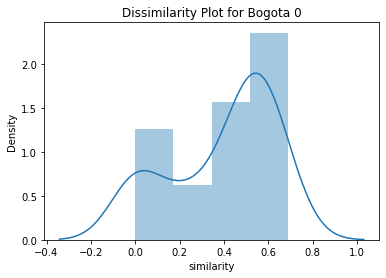

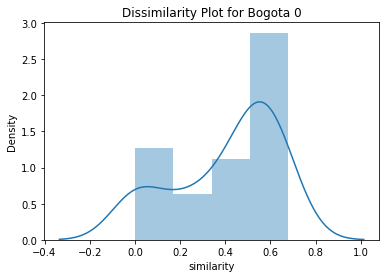

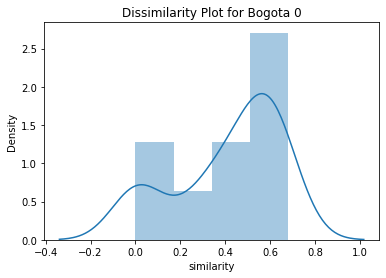

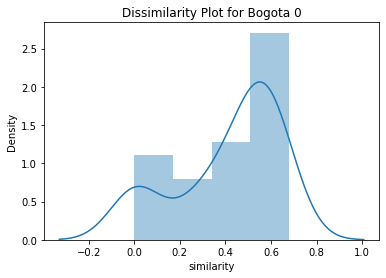

In [35]:
import seaborn as sns 

for df in [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity
                                        , stage4_bogota0_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 0")
    sns.distplot((np.log(1-df['similarity']+1)))

>> The plots are not particularly skewed, for bogota 0 ( no transparency ) is a bimodal. We can look at the mean since they are not particularly skewed. 

## Dissimilarity Plot for Bogota 1

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

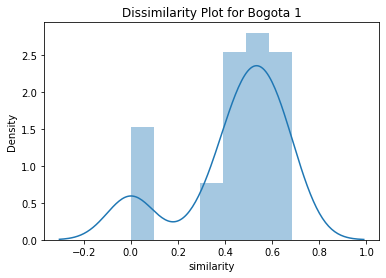

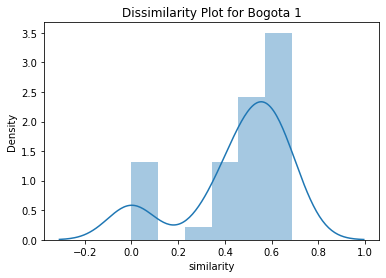

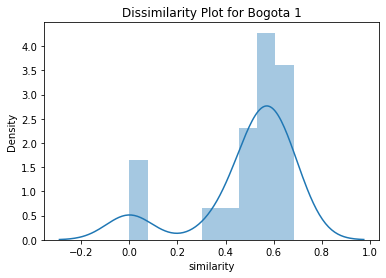

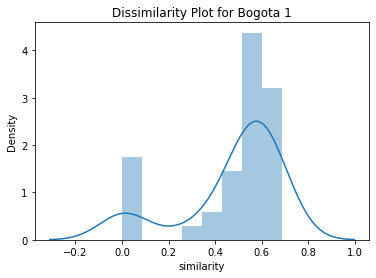

In [36]:
import seaborn as sns 

for df in [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity
                                        , stage4_bogota1_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 1")
    sns.distplot((np.log(1-df['similarity']+1)))

## Dissimilarity Plot for Bogota 2

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

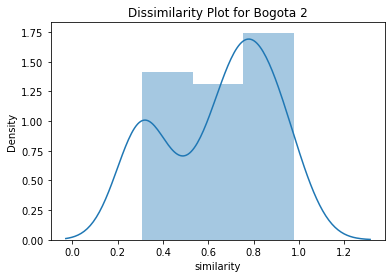

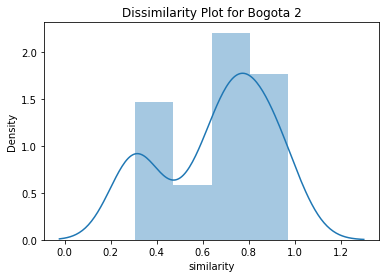

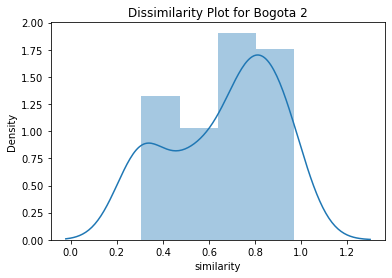

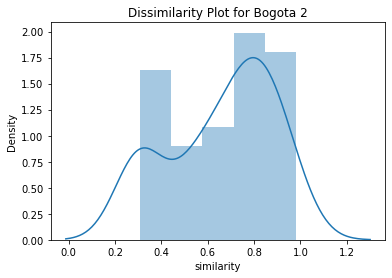

In [37]:
import seaborn as sns 

for df in [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity
                                        , stage4_bogota2_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 2")
    sns.distplot((1-np.log(df['similarity']+1)))

## Disimilarity Plot for Bogota 3

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

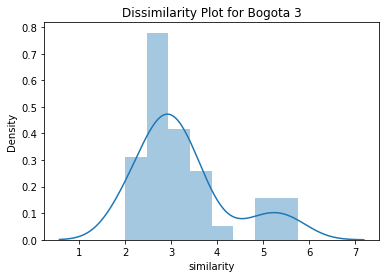

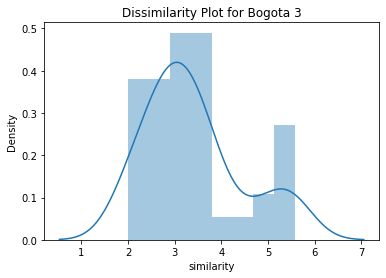

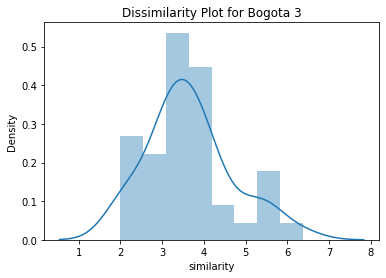

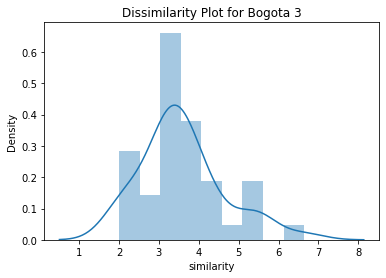

In [38]:
import seaborn as sns 

for df in [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity , stage4_bogota3_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 3")
    sns.distplot((1-np.log(df['similarity']))+1)

> Interpretation: The distributions of the dissimilarity is approximately normal which suggests that we can look at the mean. 

In [39]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []

min_log_bogota3 = []
min_log_bogota2 = []
min_log_bogota1 = []
min_log_bogota0 = []

for df in [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    max_value = np.log((1-df['similarity'])+1).max()
    max_log_bogota3.append(max_value)
    min_value = np.log((1-df['similarity'])+1).min()
    min_log_bogota3.append(min_value)
    median_log_bogota3.append(median_value)
    mean_log_bogota3.append(mean_value)

for df in [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity, stage4_bogota2_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    max_value = np.log((1-df['similarity'])+1).max()
    min_value = np.log((1-df['similarity'])+1).min()
    min_log_bogota2.append(min_value)
    max_log_bogota2.append(max_value)
    median_log_bogota2.append(median_value)
    mean_log_bogota2.append(mean_value)
    
for df in [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity, stage4_bogota1_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    max_value = np.log((1-df['similarity'])+1).max()
    min_value = np.log((1-df['similarity'])+1).min()
    min_log_bogota1.append(min_value)
    max_log_bogota1.append(max_value)
    median_log_bogota1.append(median_value)
    mean_log_bogota1.append(mean_value)

for df in [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity, stage4_bogota0_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    max_value = np.log((1-df['similarity'])+1).max()
    min_value = np.log((1-df['similarity'])+1).min()
    min_log_bogota0.append(min_value)
    max_log_bogota0.append(max_value)
    median_log_bogota0.append(median_value)
    mean_log_bogota0.append(mean_value)

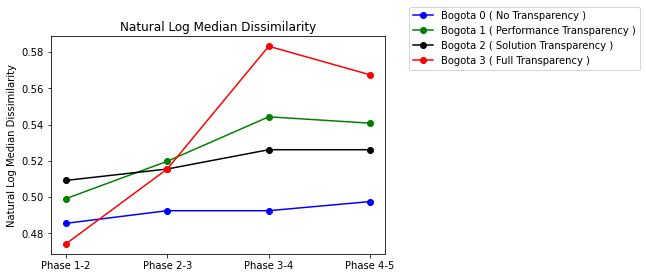

In [40]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Median Dissimilarity")
plt.ylabel("Natural Log Median Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

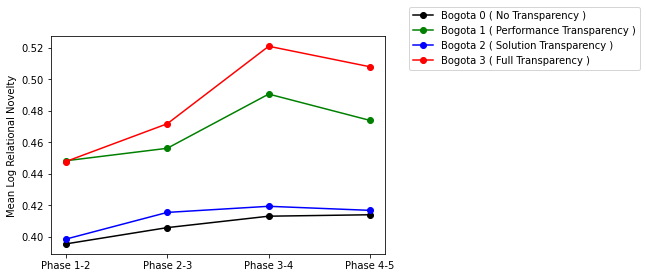

In [41]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'bo-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.ylabel("Mean Log Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

> goes into paper

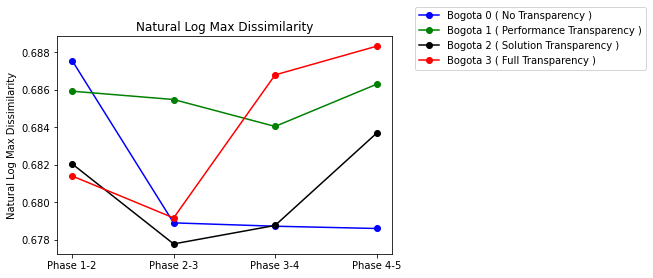

In [42]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = max_log_bogota0
y2 = max_log_bogota1
y3 = max_log_bogota2
y4 = max_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Max Dissimilarity")
plt.ylabel("Natural Log Max Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

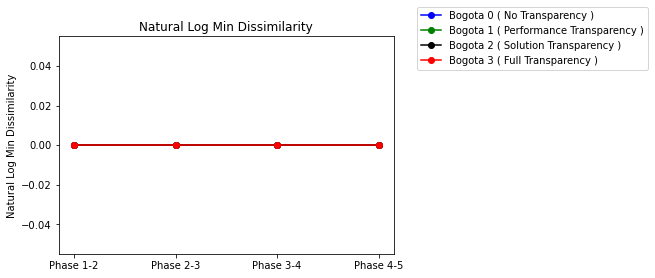

In [43]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = min_log_bogota0
y2 = min_log_bogota1
y3 = min_log_bogota2
y4 = min_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Min Dissimilarity")
plt.ylabel("Natural Log Min Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [44]:
# T-tests between Bogota 3 and Bogota 1

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity,  stage4_bogota1_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var = False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]
        

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota1_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota1_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota1_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota1_high_similarity   

    statistics    pvalue  
0    -0.010934  0.504348  
5     0.340438  0.367221  
10    0.705430  0.241326  
15    0.754863  0.226316

In [45]:
# T-tests between Bogota 3 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var=False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota0_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota0_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota0_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota0_high_similarity   

    statistics    pvalue  
0     1.054845  0.147535  
5     1.357731  0.089416  
10    2.260578  0.013485  
15    1.984034  0.025572

In [46]:
# T-tests between Bogota 3 and Bogota 2

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity,  stage4_bogota2_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var=False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota2_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota2_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota2_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota2_high_similarity   

    statistics    pvalue  
0     0.965271  0.168753  
5     1.128550  0.131332  
10    2.115926  0.018861  
15    1.897644  0.030786

In [47]:
# T-tests between Bogota 2 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity,  stage4_bogota2_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var = False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

group1                          group2  \
0   stage1_bogota2_high_similarity  stage1_bogota0_high_similarity   
5   stage2_bogota2_high_similarity  stage2_bogota0_high_similarity   
10  stage3_bogota2_high_similarity  stage3_bogota0_high_similarity   
15  stage4_bogota2_high_similarity  stage4_bogota0_high_similarity   

    statistics    pvalue  
0     0.054374  0.478390  
5     0.177231  0.429899  
10    0.115795  0.454060  
15    0.052573  0.479105

In [48]:
# T-tests between Bogota 1 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity,  stage4_bogota1_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), equal_var = False, alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

group1                          group2  \
0   stage1_bogota1_high_similarity  stage1_bogota0_high_similarity   
5   stage2_bogota1_high_similarity  stage2_bogota0_high_similarity   
10  stage3_bogota1_high_similarity  stage3_bogota0_high_similarity   
15  stage4_bogota1_high_similarity  stage4_bogota0_high_similarity   

    statistics    pvalue  
0     1.034843  0.152090  
5     0.992432  0.162122  
10    1.553320  0.062372  
15    1.188284  0.119263

## Mann Whitneyu Test

In [49]:
# T-tests between Bogota 3 and Bogota 1

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity,  stage4_bogota1_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        mann_result = mannwhitneyu(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], mann_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]
        

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota1_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota1_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota1_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota1_high_similarity   

    statistics    pvalue  
0     1.188284  0.650917  
5     1.188284  0.460457  
10    1.188284  0.192278  
15    1.188284  0.242147

In [50]:
# T-tests between Bogota 3 and Bogota 2

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity,  stage4_bogota2_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        mann_result = mannwhitneyu(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], mann_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]
        

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota2_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota2_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota2_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota2_high_similarity   

    statistics    pvalue  
0     1.188284  0.464766  
5     1.188284  0.257574  
10    1.188284  0.040374  
15    1.188284  0.035401

In [51]:
# T-tests between Bogota 3 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        mann_result = mannwhitneyu(np.log(1-list1[x]['similarity']+1), np.log(1-list2[y]['similarity']+1), alternative = 'greater')
        results.append([name_list1, name_list2, ttest_result[0], mann_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]
        

group1                          group2  \
0   stage1_bogota3_high_similarity  stage1_bogota0_high_similarity   
5   stage2_bogota3_high_similarity  stage2_bogota0_high_similarity   
10  stage3_bogota3_high_similarity  stage3_bogota0_high_similarity   
15  stage4_bogota3_high_similarity  stage4_bogota0_high_similarity   

    statistics    pvalue  
0     1.188284  0.285549  
5     1.188284  0.141870  
10    1.188284  0.011207  
15    1.188284  0.013790

In [52]:
# to be used in correlation notebook 

%store stage1_bogota0_high_similarity
%store stage1_bogota1_high_similarity
%store stage1_bogota2_high_similarity
%store stage1_bogota3_high_similarity

%store stage2_bogota0_high_similarity
%store stage2_bogota1_high_similarity
%store stage2_bogota2_high_similarity
%store stage2_bogota3_high_similarity

%store stage3_bogota0_high_similarity
%store stage3_bogota1_high_similarity
%store stage3_bogota2_high_similarity
%store stage3_bogota3_high_similarity

%store stage4_bogota0_high_similarity
%store stage4_bogota1_high_similarity
%store stage4_bogota2_high_similarity
%store stage4_bogota3_high_similarity


# to be used in correlation notebook 

%store stage1_bogota0
%store stage1_bogota1
%store stage1_bogota2
%store stage1_bogota3

%store stage2_bogota0
%store stage2_bogota1
%store stage2_bogota2
%store stage2_bogota3

%store stage3_bogota0
%store stage3_bogota1
%store stage3_bogota2
%store stage3_bogota3

%store stage4_bogota0
%store stage4_bogota1
%store stage4_bogota2
%store stage4_bogota3

Stored 'stage1_bogota0_high_similarity' (DataFrame)
Stored 'stage1_bogota1_high_similarity' (DataFrame)
Stored 'stage1_bogota2_high_similarity' (DataFrame)
Stored 'stage1_bogota3_high_similarity' (DataFrame)
Stored 'stage2_bogota0_high_similarity' (DataFrame)
Stored 'stage2_bogota1_high_similarity' (DataFrame)
Stored 'stage2_bogota2_high_similarity' (DataFrame)
Stored 'stage2_bogota3_high_similarity' (DataFrame)
Stored 'stage3_bogota0_high_similarity' (DataFrame)
Stored 'stage3_bogota1_high_similarity' (DataFrame)
Stored 'stage3_bogota2_high_similarity' (DataFrame)
Stored 'stage3_bogota3_high_similarity' (DataFrame)
Stored 'stage4_bogota0_high_similarity' (DataFrame)
Stored 'stage4_bogota1_high_similarity' (DataFrame)
Stored 'stage4_bogota2_high_similarity' (DataFrame)
Stored 'stage4_bogota3_high_similarity' (DataFrame)
Stored 'stage1_bogota0' (DataFrame)
Stored 'stage1_bogota1' (DataFrame)
Stored 'stage1_bogota2' (DataFrame)
Stored 'stage1_bogota3' (DataFrame)
Stored 'stage2_bogota0' 

> Without considering the effect of time, bogota 0 is different from bogota 3. Theoretically, transparency will lead to 
convergence from Bodreau and Bernstein paper. The first mechanism is about reuse and cognitive fixation. This mechanism is
explaining what solution transparency does. As a result, we might compare only 2 groups, those with and without solution transparency, and we would find that the 
opposite is through. 

> The second mechanism is social aspirations. March and Shapiro's paper on social aspirations. Brunswicker 2020 also explain that. 
The groups with performance transparency will have reference points that motivate them to jump and innovate if they are below the best. 
As a result, we might also compare those with and without performance transparency. 

> Run a t-test for each plot and phase. 


## Comments 

> Significant difference Between Full Transparency and No Transparency 

* Stage 2 - 0.034952
* Stage 3 - 0.048080